In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster.bicluster import SpectralCoclustering

In [4]:
whisky = pd.read_csv('whiskies.txt')
whisky['Region'] = pd.read_csv('regions.txt')
flavors = whisky.iloc[:, 2:14]
corr_flavors = pd.DataFrame.corr(flavors)
corr_whisky = pd.DataFrame.corr(flavors.transpose())

In [5]:
model = SpectralCoclustering(n_clusters = 6, random_state = 0)
model.fit(corr_whisky)

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=6,
           n_init=10, n_jobs=1, n_svd_vecs=None, random_state=0,
           svd_method='randomized')

In [7]:
#extract the group labels form the model and append them to whiskey table
#specify their index explicity
whisky['Group'] = pd.Series(model.row_labels_, index = whisky.index)

In [8]:
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands,5
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside,2
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands,3
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay,4
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands,5
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,Islands,0
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands,3
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623,Speyside,2
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,Speyside,5
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770,Highlands,3


In [9]:
#reorder the rows in increasing order by group labels
#these are the group labes that have been discovered using 
#spectral co-clustering
whisky = whisky.ix[np.argsort(model.row_labels_)]

In [10]:
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,0
33,34,GlenElgin,2,3,1,0,0,2,1,1,1,1,2,3,IV30 3SL,322640,861040,Speyside,0
32,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,372120,860400,Speyside,0
40,41,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,Speyside,0
45,46,Glenfiddich,1,3,1,0,0,0,0,0,0,2,2,2,AB55 4DH,332680,840840,Speyside,0
47,48,Glenkinchie,1,2,1,0,0,1,2,0,0,2,2,2,EH34 5ET,344380,666690,Lowlands,0
48,49,Glenlivet,2,3,1,0,0,2,2,2,1,2,2,3,AB37 9DB,319560,828780,Speyside,0
54,55,Inchgower,1,3,1,1,0,2,2,0,1,2,1,2,AB56 5AB,342610,863970,Speyside,0
18,19,Bowmore,2,2,3,1,0,2,2,1,1,1,1,2,\tPA43 7GS,131330,659720,Islay,0
34,35,GlenGarioch,2,1,3,0,0,0,3,1,0,2,2,2,AB51 0ES,381020,827590,Highlands,0


In [11]:
#reset the index of DataFrame
whisky = whisky.reset_index(drop = True)

In [12]:
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
0,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,0
1,34,GlenElgin,2,3,1,0,0,2,1,1,1,1,2,3,IV30 3SL,322640,861040,Speyside,0
2,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,372120,860400,Speyside,0
3,41,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,Speyside,0
4,46,Glenfiddich,1,3,1,0,0,0,0,0,0,2,2,2,AB55 4DH,332680,840840,Speyside,0
5,48,Glenkinchie,1,2,1,0,0,1,2,0,0,2,2,2,EH34 5ET,344380,666690,Lowlands,0
6,49,Glenlivet,2,3,1,0,0,2,2,2,1,2,2,3,AB37 9DB,319560,828780,Speyside,0
7,55,Inchgower,1,3,1,1,0,2,2,0,1,2,1,2,AB56 5AB,342610,863970,Speyside,0
8,19,Bowmore,2,2,3,1,0,2,2,1,1,1,1,2,\tPA43 7GS,131330,659720,Islay,0
9,35,GlenGarioch,2,1,3,0,0,0,3,1,0,2,2,2,AB51 0ES,381020,827590,Highlands,0


In [13]:
#recalculate the colleration matrix
#turn the colleration matrix into numPy array
whisky.iloc[:, 2:14].transpose()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
Body,2,2,2,1,1,1,2,1,2,2,...,2,3,2,2,2,1,2,1,2,2
Sweetness,3,3,3,3,3,2,3,3,2,1,...,1,2,2,3,2,2,3,2,2,2
Smoky,0,1,1,1,1,1,1,1,3,3,...,1,2,2,1,2,0,1,0,1,2
Medicinal,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
Tobacco,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Honey,0,2,1,0,0,1,2,2,2,0,...,1,3,2,2,1,1,2,1,2,2
Spicy,2,1,1,1,0,2,2,2,2,3,...,1,1,2,2,2,1,1,0,1,1
Winey,1,1,2,1,0,0,2,0,1,1,...,1,1,1,1,2,1,1,1,1,2
Nutty,1,1,0,1,0,0,1,1,1,0,...,2,2,2,2,2,2,4,2,2,2
Malty,2,1,2,2,2,2,2,2,1,2,...,1,3,2,1,2,2,2,1,2,2


In [16]:
pd.DataFrame.corr(whisky.iloc[:, 2:14].transpose())

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1.000000e+00,0.449042,4.621682e-01,0.592638,0.630087,0.601457,0.573819,4.243967e-01,-0.059028,0.326236,...,0.328031,0.245416,0.385987,0.572637,0.504753,0.609756,4.077954e-01,0.504753,0.349215,0.267222
1,4.490417e-01,1.000000,2.897749e-01,0.574257,0.708794,0.667267,0.895813,6.511204e-01,0.514776,0.263432,...,0.656904,0.626938,0.700081,0.857537,0.584999,0.638112,6.058929e-01,0.623360,0.744445,0.700081
2,4.621682e-01,0.289775,1.000000e+00,0.660578,0.411706,0.204037,0.426401,3.547874e-01,0.197386,0.090909,...,-0.219382,0.174078,0.033095,0.174078,0.165476,-0.081559,-3.532528e-17,0.033095,0.077850,0.165476
3,5.926378e-01,0.574257,6.605783e-01,1.000000,0.703906,0.529503,0.677772,6.445034e-01,0.358569,0.330289,...,0.265684,0.361403,0.480963,0.527046,0.601204,0.395092,4.954337e-01,0.360722,0.424264,0.480963
4,6.300875e-01,0.708794,4.117056e-01,0.703906,1.000000,0.753206,0.653156,5.985922e-01,0.262915,0.387488,...,0.370138,0.457114,0.484906,0.510113,0.484906,0.630087,4.117056e-01,0.520172,0.559954,0.484906
5,6.014571e-01,0.667267,2.040374e-01,0.529503,0.753206,1.000000,0.751945,7.583705e-01,0.443014,0.670409,...,0.398596,0.502331,0.689735,0.613960,0.562400,0.601457,2.914820e-01,0.265283,0.524182,0.435064
6,5.738190e-01,0.895813,4.264014e-01,0.677772,0.653156,0.751945,1.000000,6.587065e-01,0.462910,0.426401,...,0.600245,0.612372,0.737343,0.816497,0.737343,0.669456,5.330018e-01,0.543305,0.684653,0.737343
7,4.243967e-01,0.651120,3.547874e-01,0.644503,0.598592,0.758370,0.658706,1.000000e+00,0.513553,0.236525,...,0.190261,0.485262,0.602743,0.679366,0.344425,0.424397,4.730499e-01,0.301372,0.607644,0.344425
8,-5.902813e-02,0.514776,1.973855e-01,0.358569,0.262915,0.443014,0.462910,5.135526e-01,1.000000,0.592157,...,0.317554,0.485954,0.646718,0.503953,0.503003,-0.059028,1.973855e-01,-0.071858,0.338062,0.503003
9,3.262363e-01,0.263432,9.090909e-02,0.330289,0.387488,0.670409,0.426401,2.365250e-01,0.592157,1.000000,...,0.365636,0.298419,0.562618,0.261116,0.661903,0.163118,-4.545455e-02,-0.165476,0.116775,0.364047


In [17]:
collerations = pd.DataFrame.corr(whisky.iloc[:, 2:14].transpose())

In [19]:
#Turn collerations into a numpy array
collerations = np.array(collerations)

In [20]:
collerations

array([[ 1.        ,  0.44904168,  0.46216816, ...,  0.50475261,
         0.34921515,  0.26722197],
       [ 0.44904168,  1.        ,  0.28977485, ...,  0.62335961,
         0.74444508,  0.7000808 ],
       [ 0.46216816,  0.28977485,  1.        , ...,  0.03309517,
         0.07784989,  0.16547585],
       ..., 
       [ 0.50475261,  0.62335961,  0.03309517, ...,  1.        ,
         0.76520727,  0.6626506 ],
       [ 0.34921515,  0.74444508,  0.07784989, ...,  0.76520727,
         1.        ,  0.76520727],
       [ 0.26722197,  0.7000808 ,  0.16547585, ...,  0.6626506 ,
         0.76520727,  1.        ]])

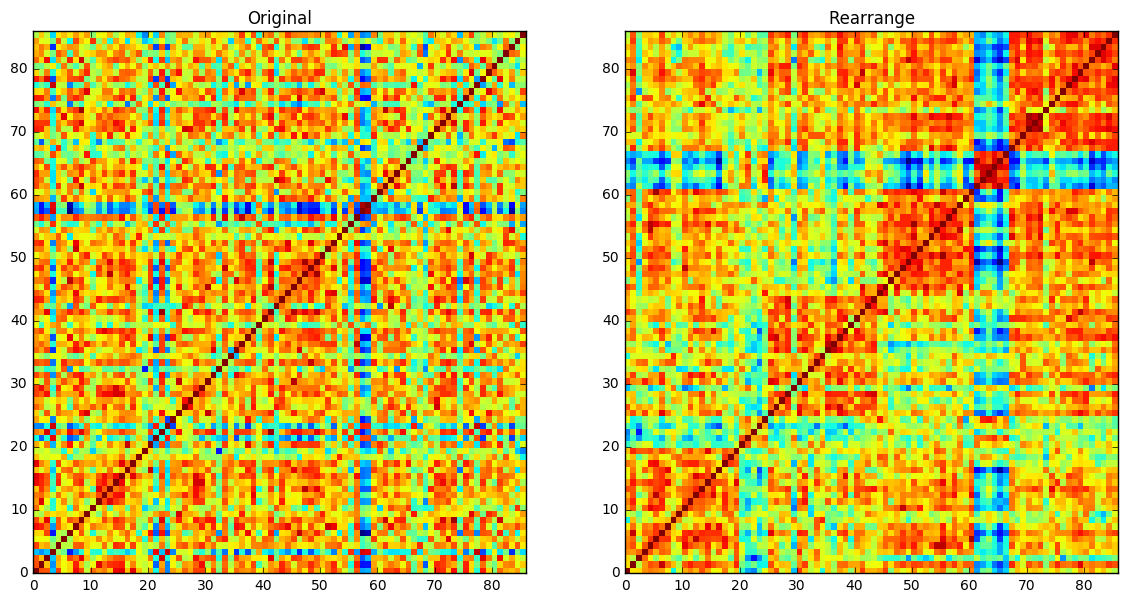

In [25]:
#Plot the original correlation coefficients
#and the rearranged correlation coeficients
#expect to form clusters

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title('Original')
plt.axis('tight')
plt.subplot(122)
plt.pcolor(collerations)
plt.title('Rearrange')
plt.axis('tight')
plt.savefig('collerations.pdf')
plt.show()

#### Q1: Comparing Correlation Matrices

Consider the following code:

```
import pandas as pd 
data = pd.Series([1,2,3,4]) 
data = data.ix[[3,0,1,2]]
```

What does ```data[0]``` return? Why?

1. **```1 : data.ix``` alters the order of appearance, but leaves the indices the same.**
2. ```2 : data.ix``` reorders the indices according to the argument.
3. ```3 : data.ix``` resets the Series to the values given as the argument.
4. ```4 : ```The 0th index of the data has been reordered to correspond to index 3 of the original, which is 4.
5. This code contains an error.

#### Q2: Comparing Correlation Matrices

Consider the following code:

```
import pandas as pd 
data = pd.Series([1,2,3,4]) 
data = data.ix[[3,0,1,2]] 
data = data.reset_index(drop=True)
```

What does ```data[0]``` return? Why?

1. ```1 : data.reset_index``` resets the order of appearance, altering the indices to the original.
2. ```2 : data.reset_index``` reorders the indices according to the data.ix argument.
3. ```3 : data.reset_index``` resets the Series to the values given in the data.ix argument.
4. **```4 :``` The 0th index of the data has been reordered to index 3 of the original, which is 4.**
5. This code contains an error.